<a href="https://www.kaggle.com/code/summerakousar/credit-card-fraud-detection?scriptVersionId=148211191" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-fraud/README.md
/kaggle/input/credit-card-fraud/datapackage.json
/kaggle/input/credit-card-fraud/archive/creditcard.csv
/kaggle/input/credit-card-fraud/data/creditcard_csv.csv
/kaggle/input/credit-card-fraud/data/creditcard_json.json
/kaggle/input/credit-card-fraud/data/validation_report.json


# Load Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime 
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Read Data

In [3]:
df = pd.read_csv('/kaggle/input/credit-card-fraud/data/creditcard_csv.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,'0'
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,'0'
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,'0'
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,'0'
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,'0'


In [4]:
df.shape

(284807, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**Change the datatype of Class from object to int**

In [6]:
df['Class'] = df['Class'].str.strip("'")
df['Class'] = df['Class'].astype(int)

In [7]:
# check dtype of class 
df['Class'].dtypes

dtype('int64')

In [8]:
# check duplicated values in data
df.duplicated().sum()

1081

In [9]:
# Remove duplicated values from data
df = df.drop_duplicates()

## Data Exploration

In [10]:
# statistical summary of selected columns
cols =df[["Amount","Time","Class"]]
cols.describe().T

,count,mean,std,min,25%,50%,75%,max
Amount,283726.0,88.472687,250.399437,0.0,5.60,22.0,77.51,25691.16
Time,283726.0,94811.077600,47481.047891,0.0,54204.75,84692.5,139298.00,172792.00
Class,283726.0,0.001667,0.040796,0.0,0.00,0.0,0.00,1.00


- Looking to the Time feature, we can confirm that the data contains 283726.0 transactions, during 2 consecutive days (or 172792 seconds).

In [11]:
# correlation matrix
corr = df.corr()
corr.style.background_gradient(cmap='Reds')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117927,-0.010556,-0.422054,-0.105845,0.173223,-0.063279,0.085335,-0.038203,-0.007861,0.031068,-0.248536,0.125500,-0.065958,-0.100316,-0.184392,0.011286,-0.073819,0.090305,0.029537,-0.051022,0.045913,0.143727,0.051474,-0.015954,-0.233262,-0.041818,-0.005171,-0.009305,-0.010559,-0.012359
V1,0.117927,1.000000,0.006875,-0.008112,0.002257,-0.007036,0.000413,-0.009173,-0.001168,0.001828,0.000815,0.001028,-0.001524,-0.000568,-0.002663,-0.000602,-0.003345,-0.003491,-0.003535,0.000919,-0.001393,0.002818,-0.001436,-0.001330,-0.000723,-0.000222,-0.000684,-0.015706,-0.004861,-0.230105,-0.094486
V2,-0.010556,0.006875,1.000000,0.005278,-0.001495,0.005210,-0.000594,0.007425,0.002899,-0.000274,0.000620,-0.000633,0.002266,0.000680,0.002711,0.001538,0.004013,0.003244,0.002477,-0.000358,-0.001287,-0.004897,0.001237,-0.003855,0.000701,-0.001569,0.000253,0.007555,0.001611,-0.533428,0.084624
V3,-0.422054,-0.008112,0.005278,1.000000,0.002829,-0.006879,-0.001511,-0.011721,-0.001815,-0.003579,-0.009632,0.002339,-0.005900,0.000113,-0.003027,-0.001230,-0.004430,-0.008159,-0.003495,-0.000016,-0.002269,0.003500,-0.000275,0.000449,-0.000072,0.000425,-0.000094,-0.007051,-0.000134,-0.212410,-0.182322
V4,-0.105845,0.002257,-0.001495,0.002829,1.000000,0.001744,-0.000880,0.004657,0.000890,0.002154,0.002753,-0.001223,0.003366,0.000177,0.002801,0.000572,0.003346,0.003655,0.002325,-0.000560,0.000318,-0.001034,0.000115,0.000732,-0.000120,0.000162,0.000777,0.001322,0.000231,0.099514,0.129326
V5,0.173223,-0.007036,0.005210,-0.006879,0.001744,1.000000,-0.000938,-0.008709,0.001430,-0.001213,-0.006050,0.000411,-0.002342,0.000019,-0.001000,-0.001171,-0.002373,-0.004466,-0.002685,0.000436,-0.001185,0.001622,-0.000559,0.001183,0.000198,0.000069,0.000390,-0.005798,-0.000820,-0.387685,-0.087812
V6,-0.063279,0.000413,-0.000594,-0.001511,-0.000880,-0.000938,1.000000,0.000436,0.003036,-0.000734,-0.002180,-0.000211,-0.001185,0.000397,0.000184,-0.000470,0.000122,-0.001716,0.000541,0.000106,-0.000181,-0.002134,0.001104,-0.000755,0.001202,0.000697,-0.000028,0.000289,0.000925,0.216389,-0.043915
V7,0.085335,-0.009173,0.007425,-0.011721,0.004657,-0.008709,0.000436,1.000000,-0.006419,-0.004921,-0.013617,0.002454,-0.006153,-0.000170,-0.003816,-0.001394,-0.005944,-0.008794,-0.004279,0.000846,-0.001192,0.009010,-0.002280,0.003303,-0.000384,-0.000072,0.000624,-0.004537,0.001657,0.400408,-0.172347
V8,-0.038203,-0.001168,0.002899,-0.001815,0.000890,0.001430,0.003036,-0.006419,1.000000,0.001038,0.000481,0.004688,-0.004414,-0.001381,-0.008387,0.001044,-0.004376,-0.005576,-0.001323,-0.000626,0.000271,0.018892,-0.006156,0.004994,0.000113,0.000011,-0.001407,0.000613,-0.000099,-0.104662,0.033068
V9,-0.007861,0.001828,-0.000274,-0.003579,0.002154,-0.001213,-0.000734,-0.004921,0.001038,1.000000,-0.012613,-0.000217,-0.002385,0.000745,0.001981,-0.000283,-0.000086,-0.002318,-0.000373,0.000247,-0.001838,0.000679,0.000785,0.000677,-0.000103,-0.000275,0.001253,0.008221,0.005591,-0.044123,-0.094021


- As expected, there is no notable correlation between features V1-V28. There are certain correlations between some of these features and Time (inverse correlation with V3) and Amount (direct correlation with V7 and V20, inverse correlation with V1 and V5).

In [12]:
#unique values count of all colums
def check_classes(df):  
    dict = {}
    for i in list(df.columns):
        dict[i] = df[i].value_counts().shape[0]

    unq = pd.DataFrame(dict,index=["Unique Count"]).transpose().sort_values(by="Unique Count", ascending=False)
    return unq

check_classes(df)

,Unique Count
V15,275663
V28,275663
V26,275663
V25,275663
V24,275663
V23,275663
V22,275663
V21,275663
V20,275663
V19,275663


In [13]:
df['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

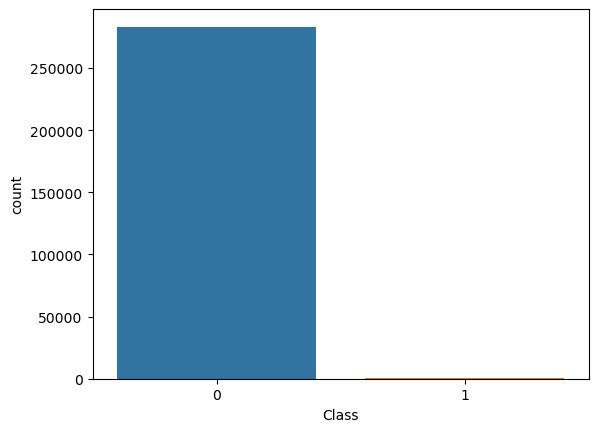

In [14]:
sns.countplot(data = df, x='Class')

- Only 473 (or 0.172%) of transaction are fraudulent. That means the data is highly unbalanced with respect with target variable Class.

In [15]:
class_0 = df.loc[df['Class'] == 0]["Time"]
class_1 = df.loc[df['Class'] == 1]["Time"]

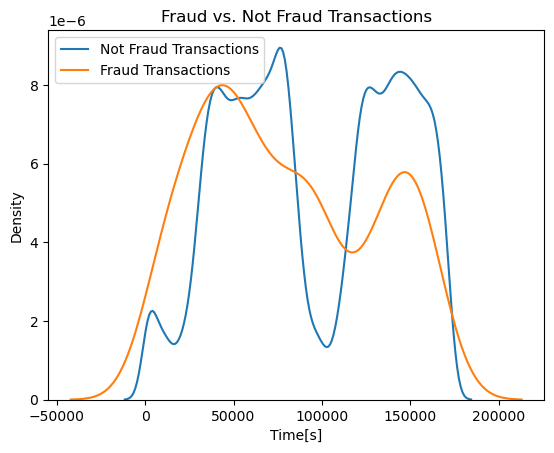

In [16]:
sns.kdeplot(data=class_0, label="Not Fraud Transactions", shade=False)
sns.kdeplot(data=class_1, label="Fraud Transactions", shade=False)
# Add labels and title
plt.xlabel("Time[s]")
plt.ylabel("Density")
plt.title("Fraud vs. Not Fraud Transactions")

# Add legend
plt.legend()

# Display the plot
plt.show()

- Fraudulent transactions have a distribution more even than valid transactions - are equaly distributed in time, including the low real transaction times.

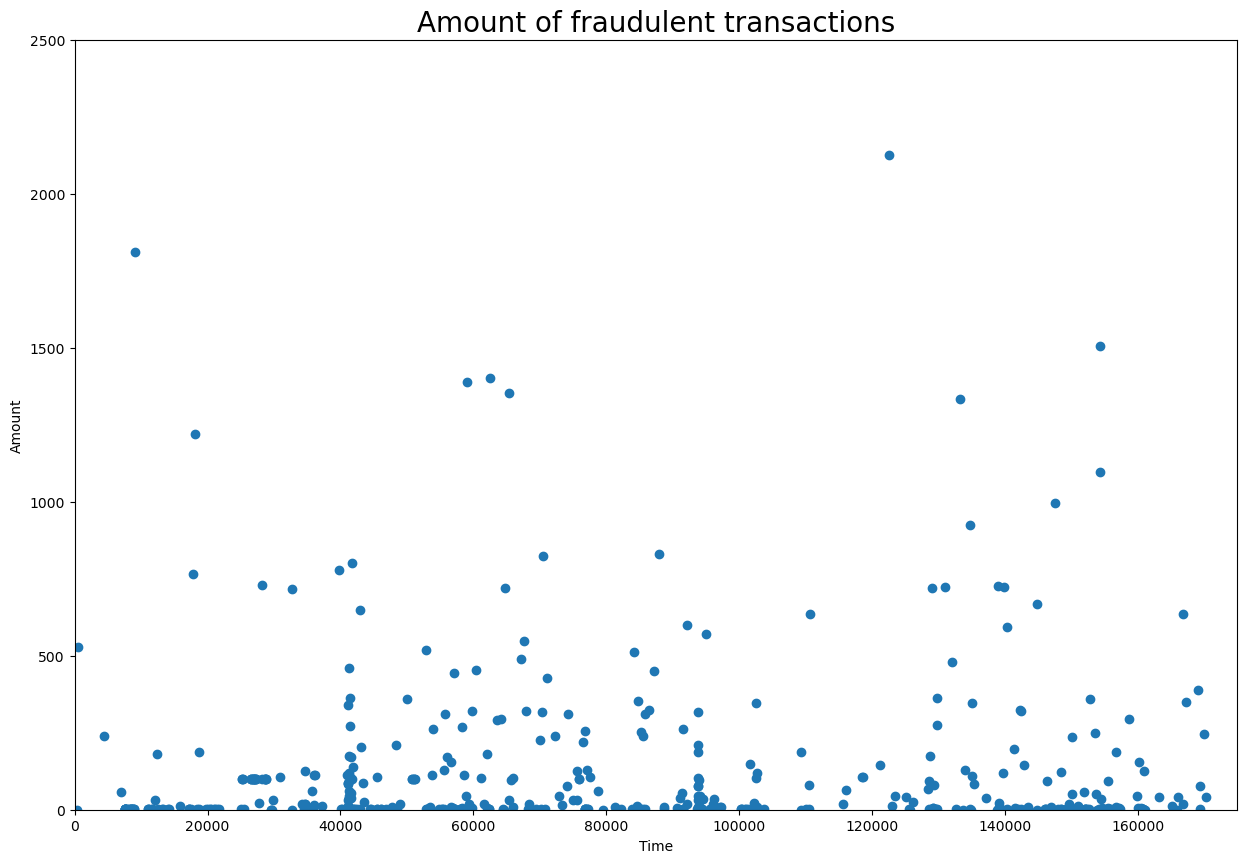

In [17]:
df_fraud = df[df['Class'] == 1] # Recovery of fraud data
plt.figure(figsize=(15,10))
plt.scatter(df_fraud['Time'], df_fraud['Amount']) # Display fraud amounts according to their time
plt.title('Amount of fraudulent transactions',size=20)
plt.xlabel('Time')
plt.ylabel('Amount')
plt.xlim([0,175000])
plt.ylim([0,2500])
plt.show()

<Figure size 640x480 with 0 Axes>

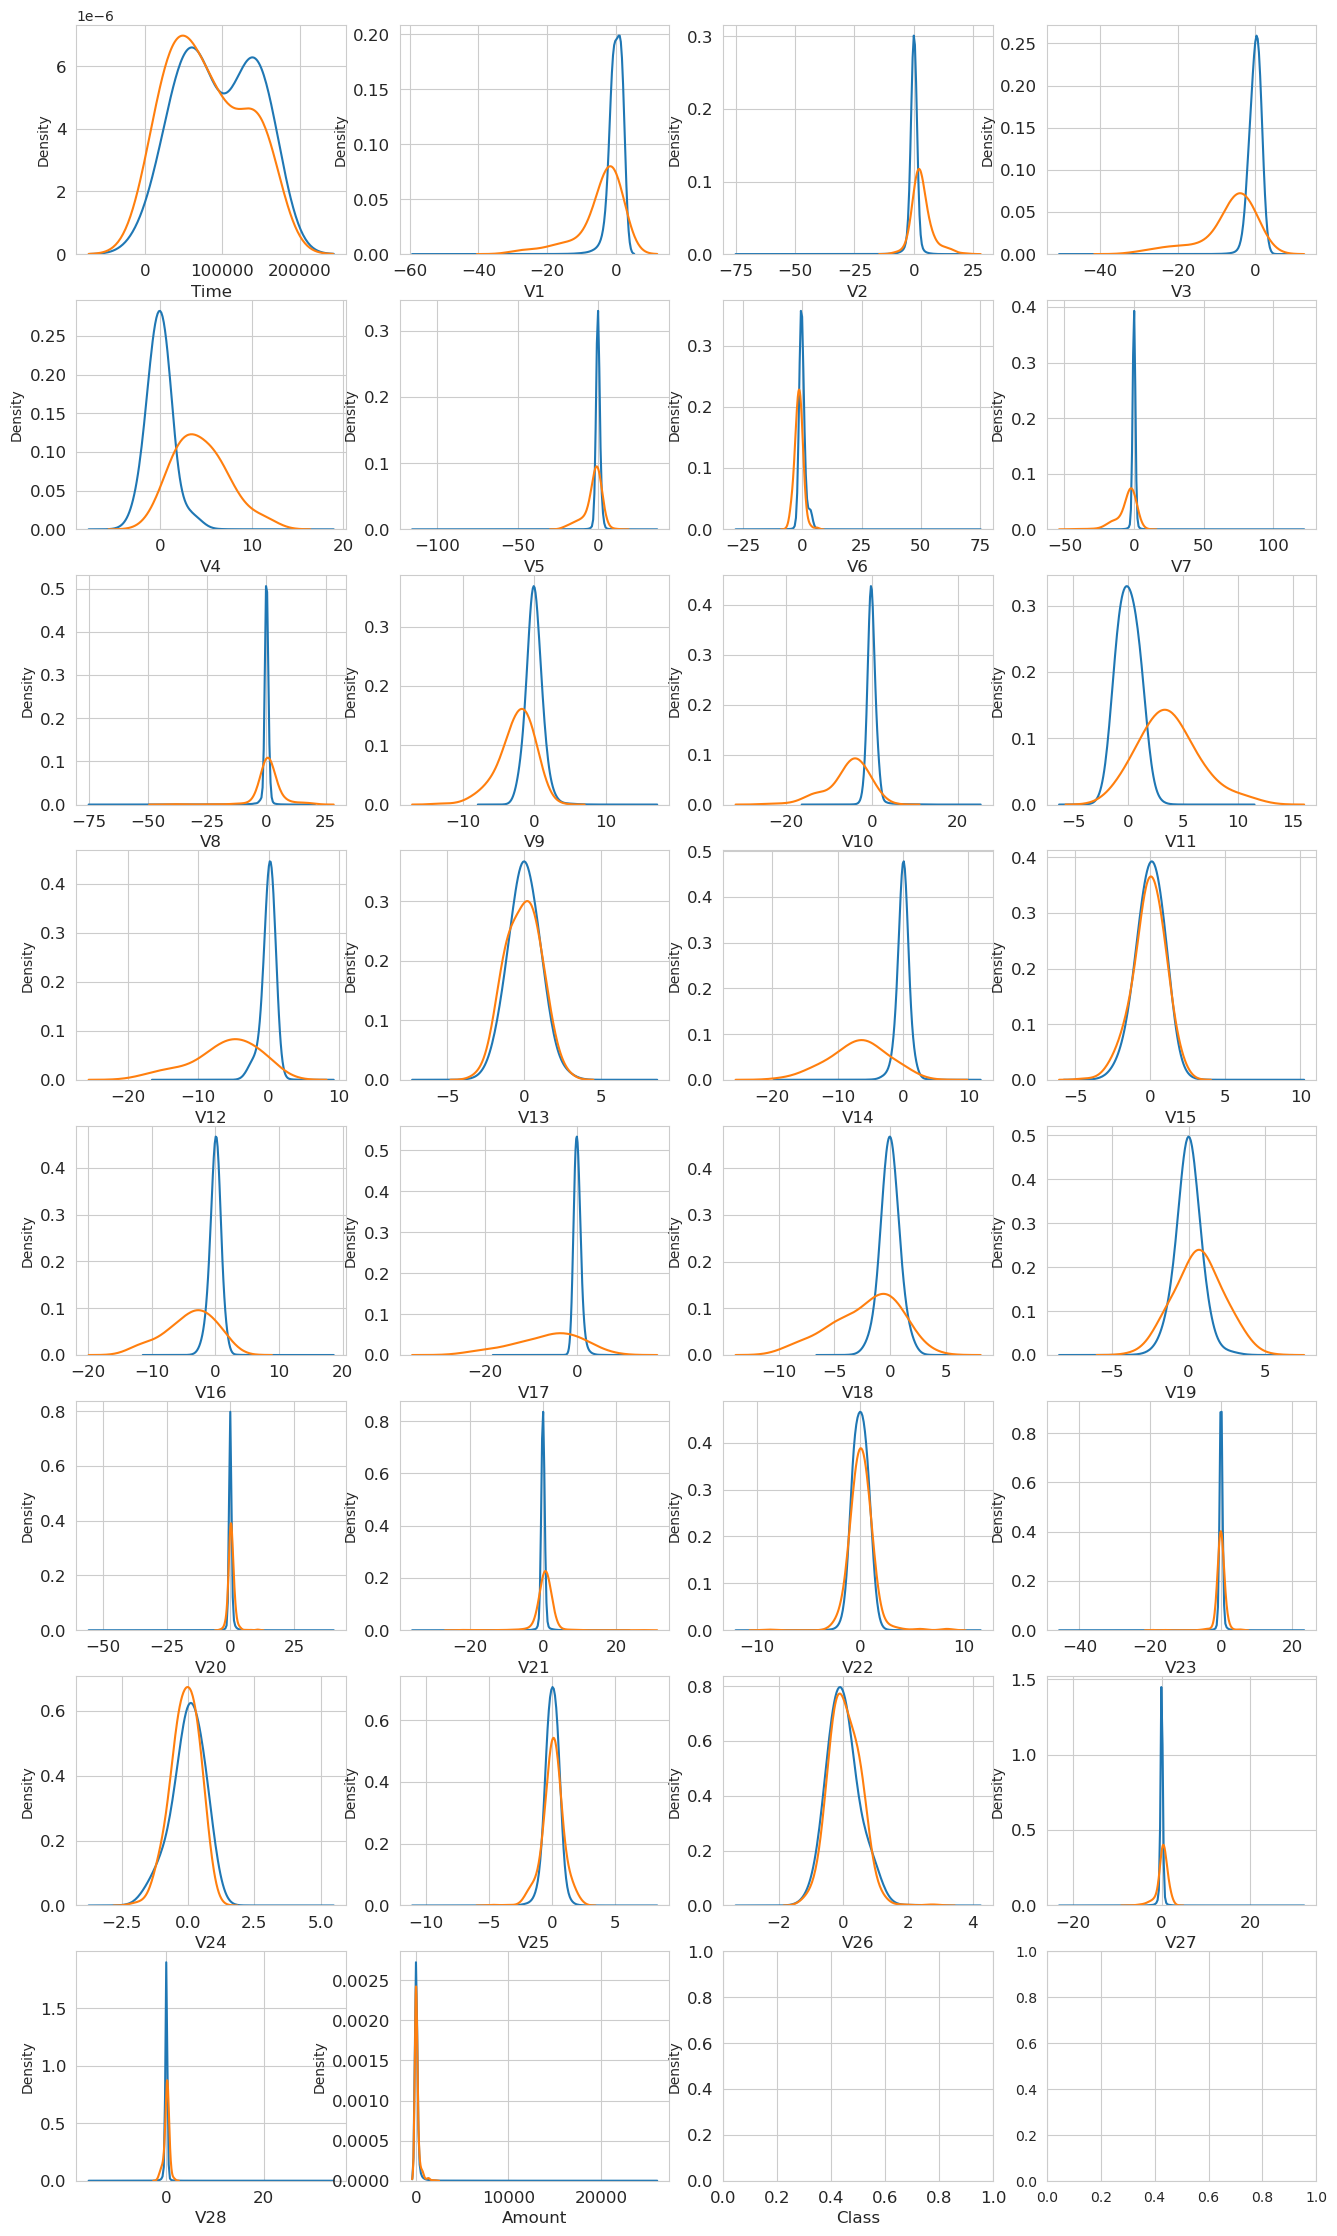

In [18]:
var = df.columns.values

i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

- For some of the features we can observe a good selectivity in terms of distribution for the two values of Class: V4, V11 have clearly separated distributions for Class values 0 and 1, V12, V14, V18 are partially separated, V1, V2, V3, V10 have a quite distinct profile, whilst V25, V26, V28 have similar profiles for the two values of Class.
- In general, with just few exceptions (Time and Amount), the features distribution for legitimate transactions (values of Class = 0) is centered around 0, sometime with a long queue at one of the extremities. In the same time, the fraudulent transactions (values of Class = 1) have a skewed (asymmetric) distribution.

# Some Feature Engineering

In [19]:
df.Amount = np.log(df.Amount + 0.001)

<Figure size 640x480 with 0 Axes>

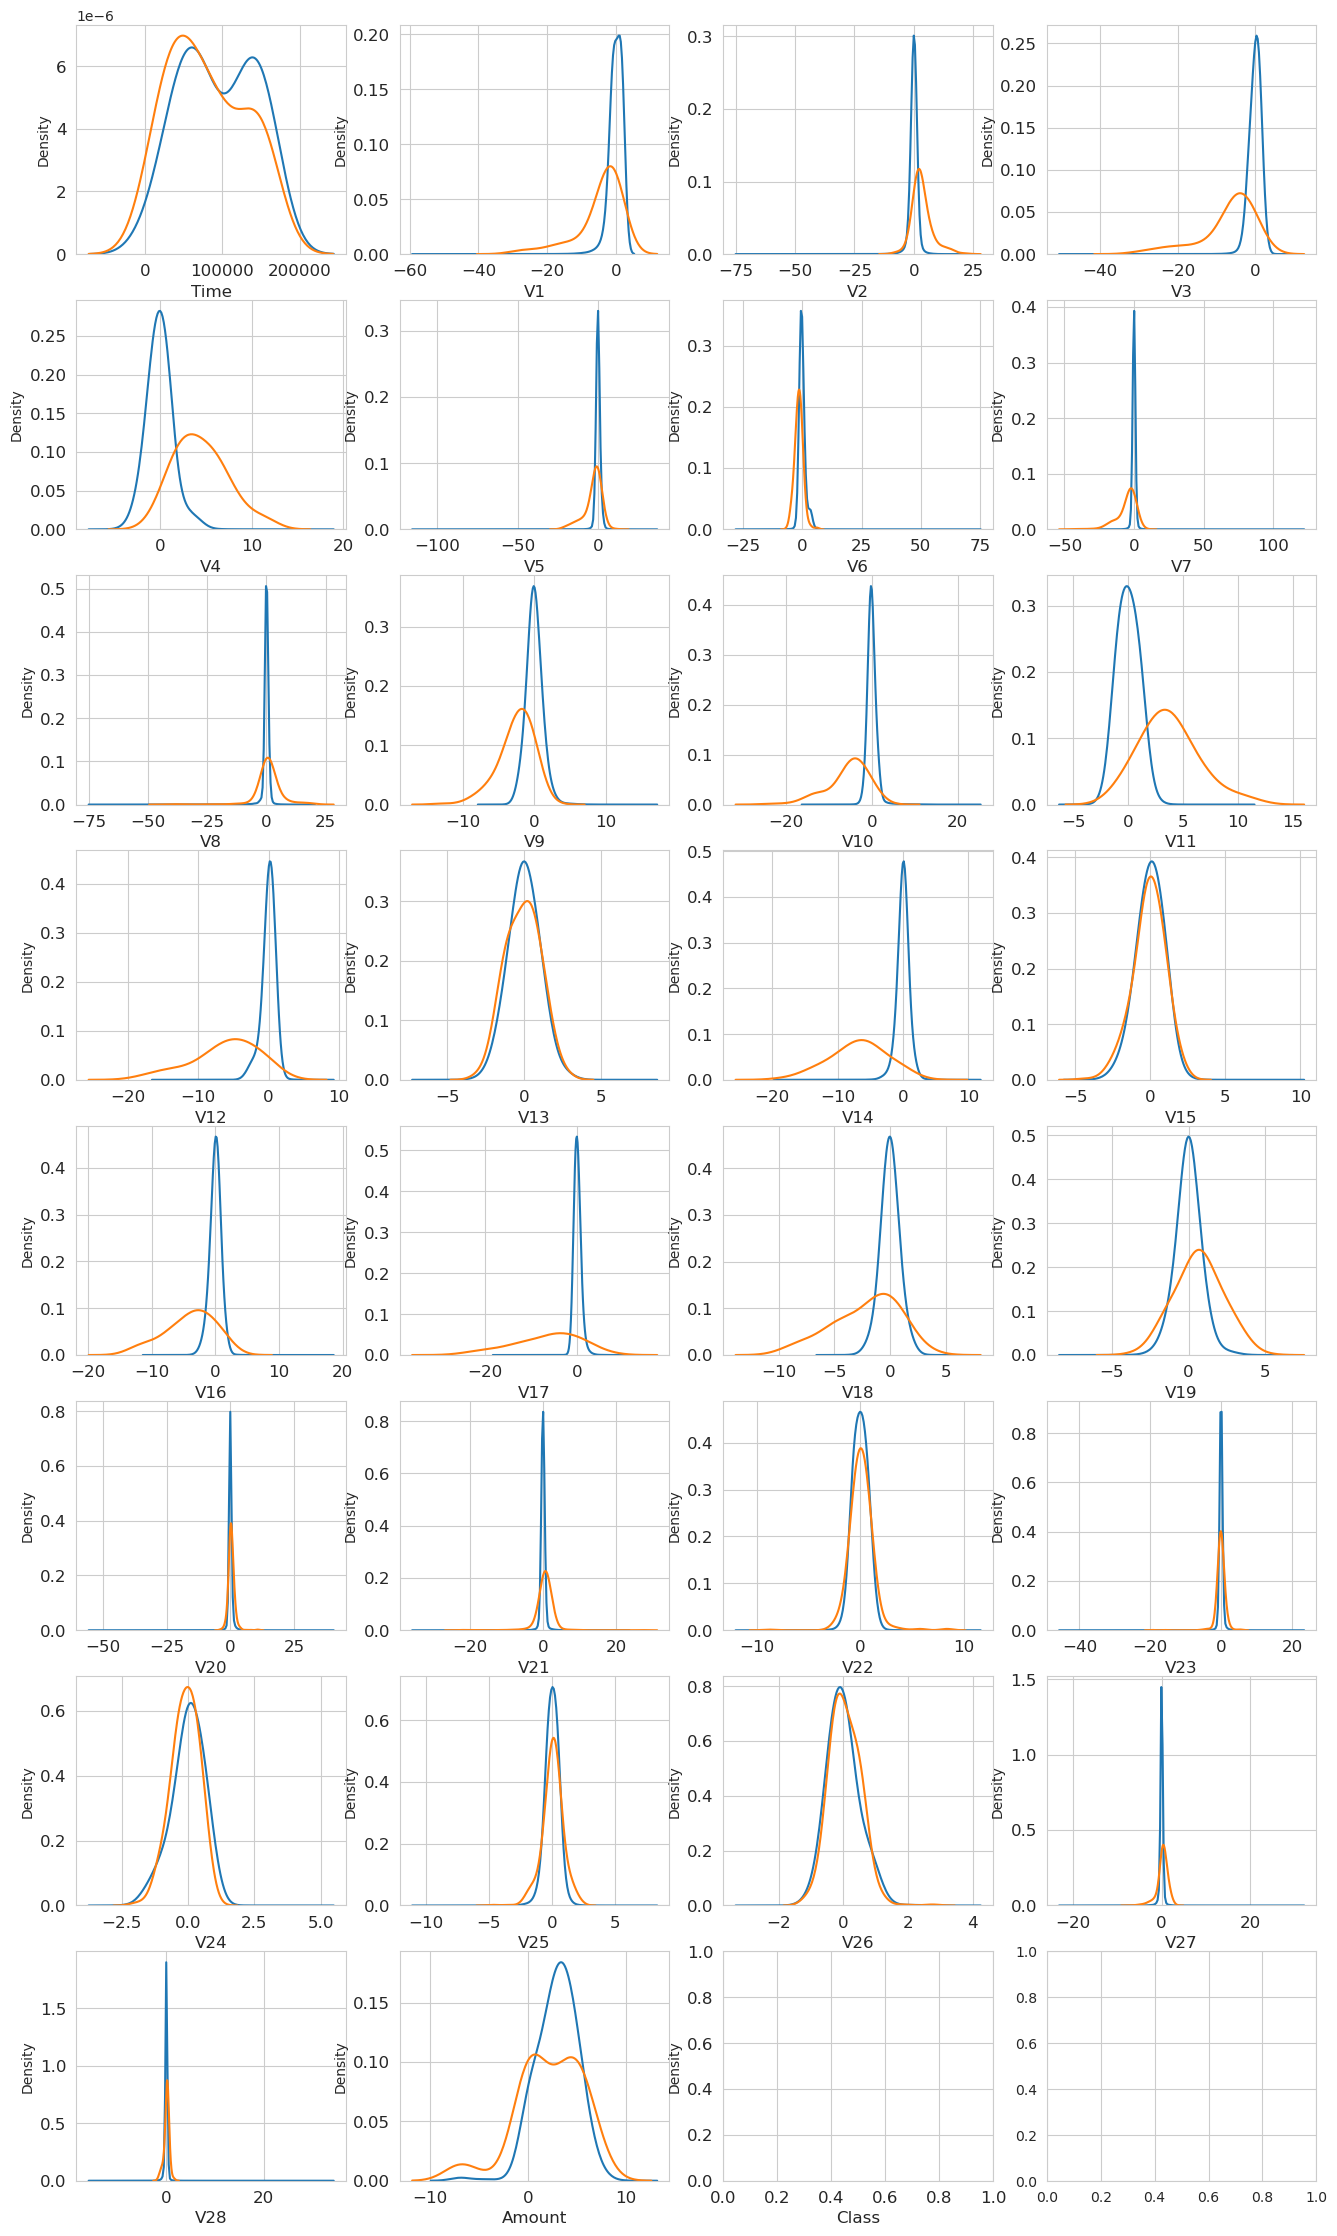

In [20]:
var = df.columns.values

i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

In [21]:
X = df.drop(["Class"], axis=1).values 
y = df["Class"].values 

# Preprocessing

# Load Packages

In [22]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import confusion_matrix # Use these functions instead
from sklearn.metrics import RocCurveDisplay

## Modelling

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a SMOTE resampling strategy
smote = SMOTE(sampling_strategy=0.5, random_state=42)

# Create classifiers
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
lr_classifier = LogisticRegression()
xgb_classifier = XGBClassifier()

In [24]:
# Create classifiers
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
lr_classifier = LogisticRegression()
xgb_classifier = XGBClassifier()

# Create a single SMOTE pipeline to resample the training data
smote_pipeline = ImbPipeline([
    ("smote", smote)
])


In [25]:
X_train_resampled, y_train_resampled = smote_pipeline.fit_resample(X_train, y_train)

In [26]:
# Create separate pipelines for each classifier
pipeline_rf = ImbPipeline([
    ("rf", rf_classifier)
])

pipeline_lr = ImbPipeline([
    ("lr", lr_classifier)
])

pipeline_xgb = ImbPipeline([
    ("xgb", xgb_classifier)
])


In [27]:
pipeline_rf.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('rf', RandomForestClassifier(random_state=42))])

In [28]:
pipeline_lr.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('lr', LogisticRegression())])

In [29]:
pipeline_xgb.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [31]:
# Make predictions on the test data for each classifier
y_pred_rf = pipeline_rf.predict(X_test)
y_pred_lr = pipeline_lr.predict(X_test)
y_pred_xgb = pipeline_xgb.predict(X_test)

In [32]:
# Get the individual classifiers from the pipelines
rf = pipeline_rf.named_steps['rf']
lr = pipeline_lr.named_steps['lr']
xgb = pipeline_xgb.named_steps['xgb']

In [33]:
# Calculate the accuracy for each classifier
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

In [34]:
# Calculate the confusion matrices for each classifier
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

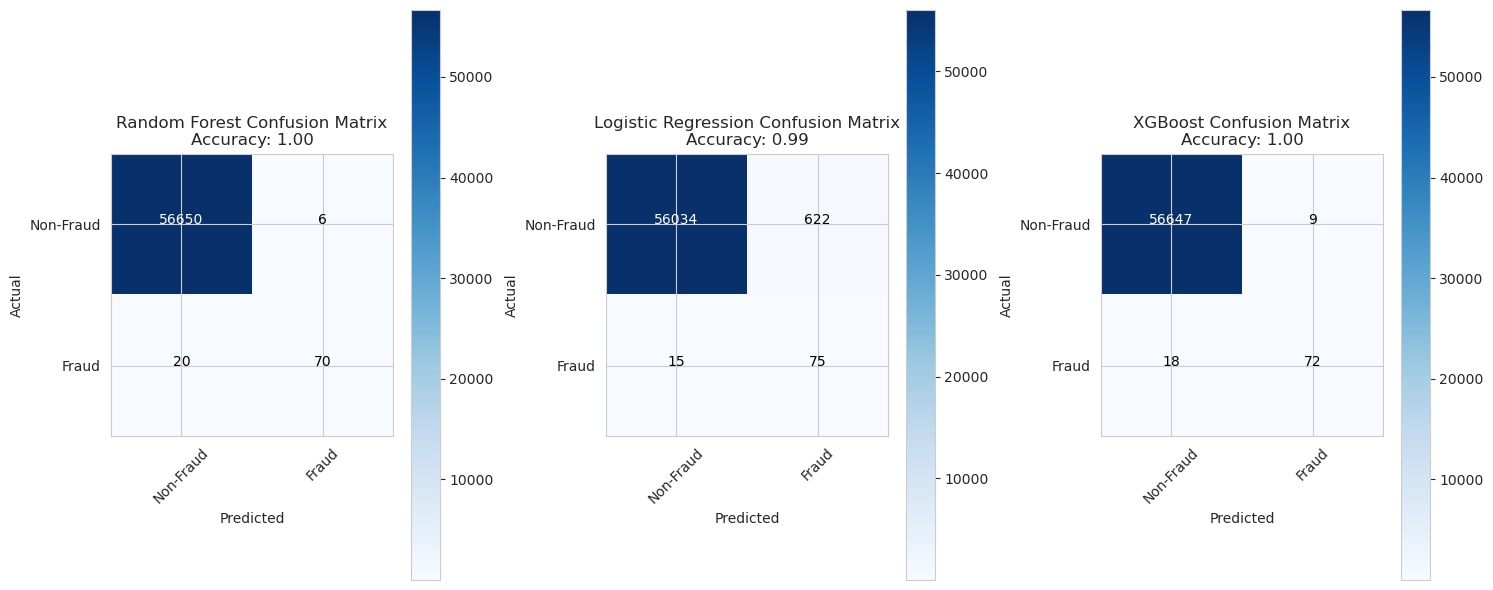

In [35]:
plt.figure(figsize=(15, 6))  
tick_marks = np.arange(2)

# Plot the confusion matrices for each classifier
plt.subplot(1, 3, 1)
plt.imshow(cm_rf, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Random Forest Confusion Matrix\nAccuracy: {:.2f}".format(accuracy_rf))
plt.colorbar()
plt.xticks(tick_marks, ["Non-Fraud", "Fraud"], rotation=45)
plt.yticks(tick_marks, ["Non-Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm_rf[i, j]), horizontalalignment="center", color="white" if cm_rf[i, j] > cm_rf.max() / 2 else "black")

plt.subplot(1, 3, 2)
plt.imshow(cm_lr, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Logistic Regression Confusion Matrix\nAccuracy: {:.2f}".format(accuracy_lr))
plt.colorbar()
plt.xticks(tick_marks, ["Non-Fraud", "Fraud"], rotation=45)
plt.yticks(tick_marks, ["Non-Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm_lr[i, j]), horizontalalignment="center", color="white" if cm_lr[i, j] > cm_lr.max() / 2 else "black")

plt.subplot(1, 3, 3)
plt.imshow(cm_xgb, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("XGBoost Confusion Matrix\nAccuracy: {:.2f}".format(accuracy_xgb))
plt.colorbar()
plt.xticks(tick_marks, ["Non-Fraud", "Fraud"], rotation=45)
plt.yticks(tick_marks, ["Non-Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm_xgb[i, j]), horizontalalignment="center", color="white" if cm_xgb[i, j] > cm_xgb.max() / 2 else "black")

plt.tight_layout()
plt.show()



In [36]:
# Classification reports
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.92      0.78      0.84        90

    accuracy                           1.00     56746
   macro avg       0.96      0.89      0.92     56746
weighted avg       1.00      1.00      1.00     56746

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     56656
           1       0.11      0.83      0.19        90

    accuracy                           0.99     56746
   macro avg       0.55      0.91      0.59     56746
weighted avg       1.00      0.99      0.99     56746

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.89      0.80      0.84        90

    accuracy                           1.00     56746
   macro avg  

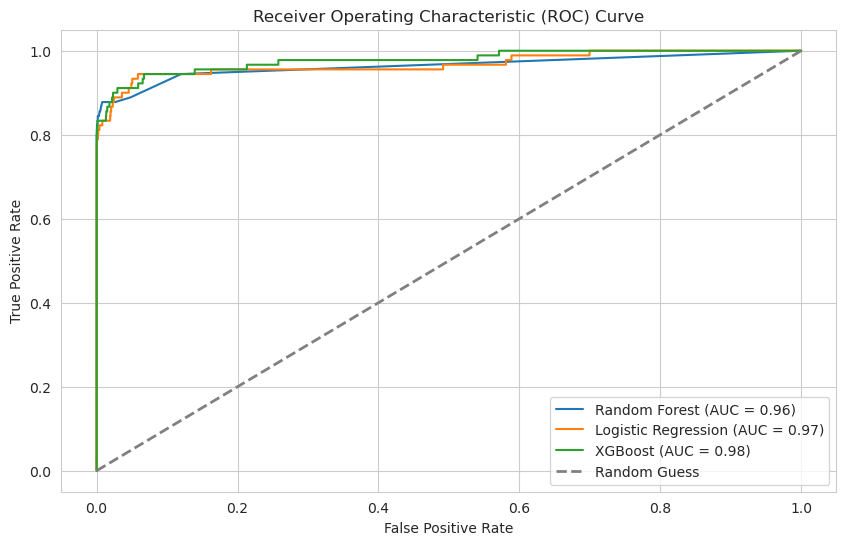

In [37]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve for each classifier
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, xgb.predict_proba(X_test)[:,1])

# Calculate ROC AUC for each classifier
roc_auc_rf = roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])
roc_auc_lr = roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])
roc_auc_xgb = roc_auc_score(y_test, xgb.predict_proba(X_test)[:,1])

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})")
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {roc_auc_lr:.2f})")
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {roc_auc_xgb:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2, label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### In progress.....